Importing the Dependencies

In [43]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

Data Collection and Processing

In [44]:
data=pd.read_csv('https://raw.githubusercontent.com/Vigneshsab/Startup-Profit-Prediction/master/50_Startups.csv')

In [45]:
data.head()


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [46]:
data.shape

(50, 5)

Data Pre-Processing

In [47]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [48]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [49]:
c = data.corr()
c

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [50]:
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

Numerical Features

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


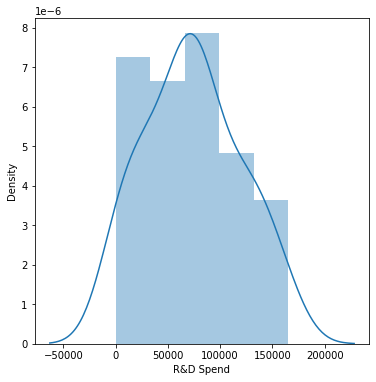

In [51]:
plt.figure(figsize=(6,6))
sns.distplot(data['R&D Spend'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


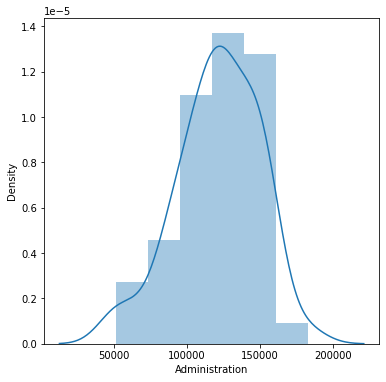

In [52]:
plt.figure(figsize=(6,6))
sns.distplot(data['Administration'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


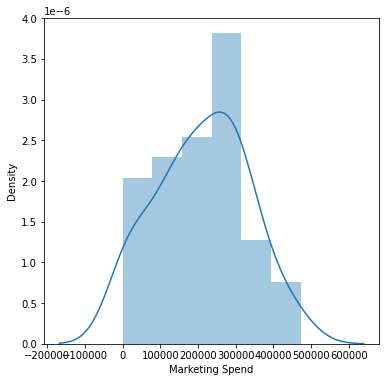

In [53]:
plt.figure(figsize=(6,6))
sns.distplot(data['Marketing Spend'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


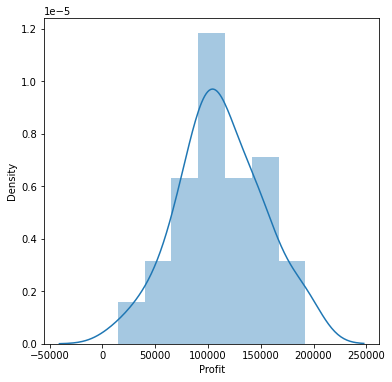

In [54]:
plt.figure(figsize=(6,6))
sns.distplot(data['Profit'])
plt.show()

Categorical Features

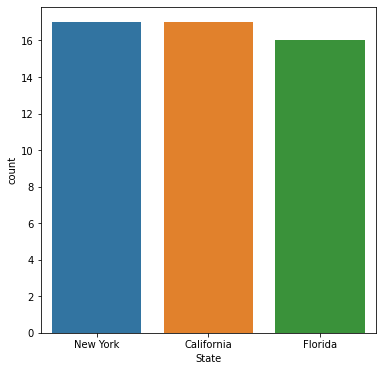

In [55]:
plt.figure(figsize=(6,6))
sns.countplot(x='State', data=data)
plt.show()

Label Encoding

In [56]:
from sklearn.preprocessing import LabelEncoder

In [57]:
encoder = LabelEncoder()

In [58]:
data['State'] = encoder.fit_transform(data['State'])

In [59]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


Splitting features and Target

In [60]:
X = data.drop(columns='Marketing Spend', axis=1)
y = data['Profit']

In [61]:
print(X)

    R&D Spend  Administration  State     Profit
0   165349.20       136897.80      2  192261.83
1   162597.70       151377.59      0  191792.06
2   153441.51       101145.55      1  191050.39
3   144372.41       118671.85      2  182901.99
4   142107.34        91391.77      1  166187.94
5   131876.90        99814.71      2  156991.12
6   134615.46       147198.87      0  156122.51
7   130298.13       145530.06      1  155752.60
8   120542.52       148718.95      2  152211.77
9   123334.88       108679.17      0  149759.96
10  101913.08       110594.11      1  146121.95
11  100671.96        91790.61      0  144259.40
12   93863.75       127320.38      1  141585.52
13   91992.39       135495.07      0  134307.35
14  119943.24       156547.42      1  132602.65
15  114523.61       122616.84      2  129917.04
16   78013.11       121597.55      0  126992.93
17   94657.16       145077.58      2  125370.37
18   91749.16       114175.79      1  124266.90
19   86419.70       153514.11      2  12

In [62]:
print(y)

0     192261.83
1     191792.06
2     191050.39
3     182901.99
4     166187.94
5     156991.12
6     156122.51
7     155752.60
8     152211.77
9     149759.96
10    146121.95
11    144259.40
12    141585.52
13    134307.35
14    132602.65
15    129917.04
16    126992.93
17    125370.37
18    124266.90
19    122776.86
20    118474.03
21    111313.02
22    110352.25
23    108733.99
24    108552.04
25    107404.34
26    105733.54
27    105008.31
28    103282.38
29    101004.64
30     99937.59
31     97483.56
32     97427.84
33     96778.92
34     96712.80
35     96479.51
36     90708.19
37     89949.14
38     81229.06
39     81005.76
40     78239.91
41     77798.83
42     71498.49
43     69758.98
44     65200.33
45     64926.08
46     49490.75
47     42559.73
48     35673.41
49     14681.40
Name: Profit, dtype: float64


Splitting the data into Training data & Testing Data

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [64]:
print(X.shape, X_train.shape, X_test.shape)

(50, 4) (40, 4) (10, 4)


In [65]:
X_train

,R&D Spend,Administration,State,Profit
33,55493.95,103057.49,1,96778.92
35,46014.02,85047.44,2,96479.51
26,75328.87,144135.98,1,105733.54
34,46426.07,157693.92,0,96712.80
18,91749.16,114175.79,1,124266.90
7,130298.13,145530.06,1,155752.60
14,119943.24,156547.42,1,132602.65
45,1000.23,124153.04,2,64926.08
48,542.05,51743.15,2,35673.41
29,65605.48,153032.06,2,101004.64


In [66]:
X_test

,R&D Spend,Administration,State,Profit
28,66051.52,182645.56,1,103282.38
11,100671.96,91790.61,0,144259.40
10,101913.08,110594.11,1,146121.95
41,27892.92,84710.77,1,77798.83
2,153441.51,101145.55,1,191050.39
27,72107.60,127864.55,2,105008.31
38,20229.59,65947.93,2,81229.06
31,61136.38,152701.92,2,97483.56
22,73994.56,122782.75,1,110352.25
4,142107.34,91391.77,1,166187.94


Machine Learning Model Training

In [67]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [68]:
y_pred=regressor.predict(X_test)

In [69]:
y_pred

array([103282.38, 144259.4 , 146121.95,  77798.83, 191050.39, 105008.31,
        81229.06,  97483.56, 110352.25, 166187.94])

In [70]:
y_test

28    103282.38
11    144259.40
10    146121.95
41     77798.83
2     191050.39
27    105008.31
38     81229.06
31     97483.56
22    110352.25
4     166187.94
Name: Profit, dtype: float64

In [71]:
import statsmodels.formula.api as sm
X=np.append(arr=np.ones((50,1)).astype(int),values=X,axis=1)

In [72]:
X

array([[1.0000000e+00, 1.6534920e+05, 1.3689780e+05, 2.0000000e+00,
        1.9226183e+05],
       [1.0000000e+00, 1.6259770e+05, 1.5137759e+05, 0.0000000e+00,
        1.9179206e+05],
       [1.0000000e+00, 1.5344151e+05, 1.0114555e+05, 1.0000000e+00,
        1.9105039e+05],
       [1.0000000e+00, 1.4437241e+05, 1.1867185e+05, 2.0000000e+00,
        1.8290199e+05],
       [1.0000000e+00, 1.4210734e+05, 9.1391770e+04, 1.0000000e+00,
        1.6618794e+05],
       [1.0000000e+00, 1.3187690e+05, 9.9814710e+04, 2.0000000e+00,
        1.5699112e+05],
       [1.0000000e+00, 1.3461546e+05, 1.4719887e+05, 0.0000000e+00,
        1.5612251e+05],
       [1.0000000e+00, 1.3029813e+05, 1.4553006e+05, 1.0000000e+00,
        1.5575260e+05],
       [1.0000000e+00, 1.2054252e+05, 1.4871895e+05, 2.0000000e+00,
        1.5221177e+05],
       [1.0000000e+00, 1.2333488e+05, 1.0867917e+05, 0.0000000e+00,
        1.4975996e+05],
       [1.0000000e+00, 1.0191308e+05, 1.1059411e+05, 1.0000000e+00,
        1.46

In [73]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [74]:
testing_data_model_score = model.score(X_test, y_test)
print("Model Score/Performance on Testing data",testing_data_model_score)

training_data_model_score = model.score(X_train, y_train)
print("Model Score/Performance on Training data",training_data_model_score)

Model Score/Performance on Testing data 1.0
Model Score/Performance on Training data 1.0


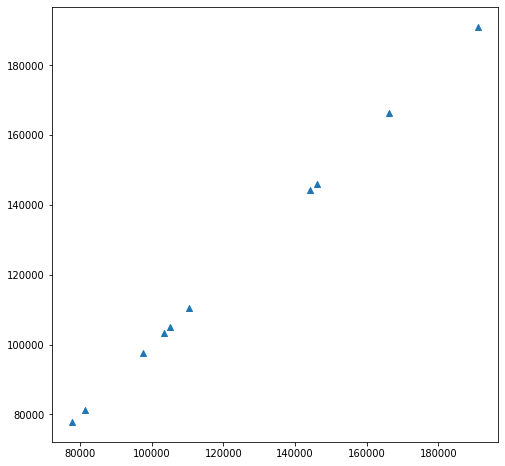

In [75]:
plt.scatter(y_test, y_pred, marker = '^')
plt.show()

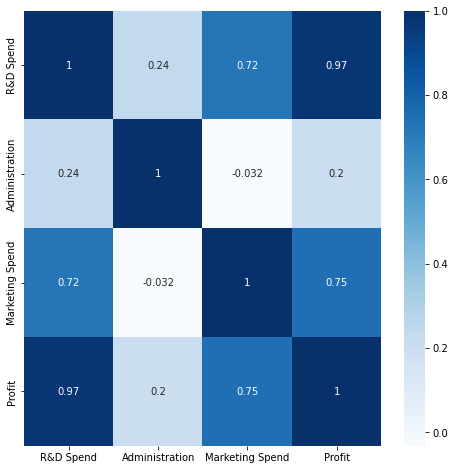

In [76]:
sns.heatmap(c,annot=True,cmap='Blues')
plt.show()

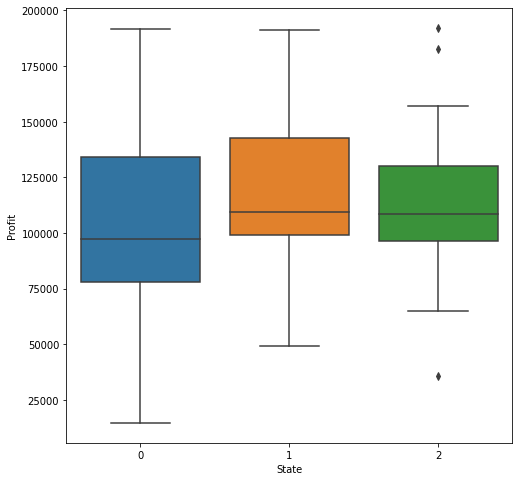

In [77]:
sns.boxplot(x = 'State', y = 'Profit', data = data)
plt.show()

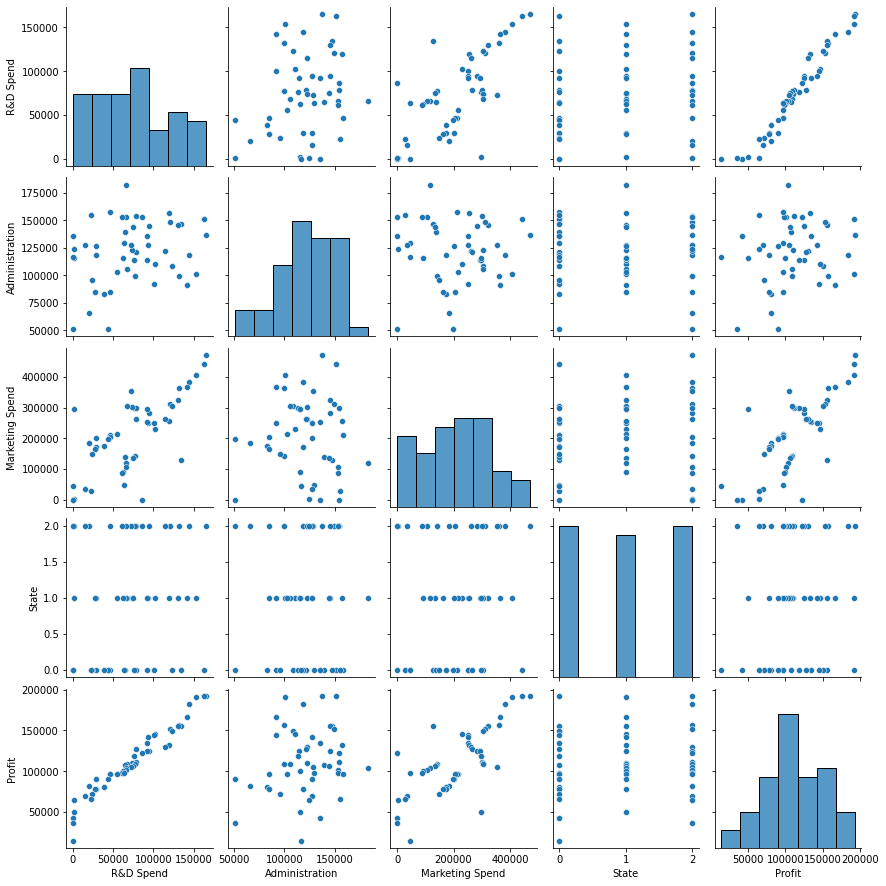

In [78]:
sns.pairplot(data)
plt.show()

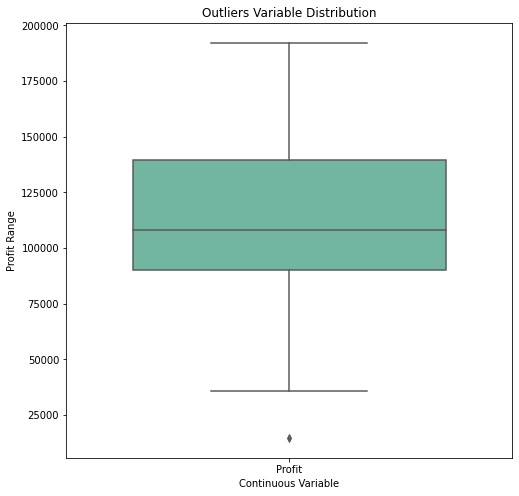

In [79]:
outliers = ['Profit']
plt.rcParams['figure.figsize'] = [8,8]
sns.boxplot(data=data[outliers], orient="v", palette="Set2" , width=0.7)
plt.title("Outliers Variable Distribution")
plt.ylabel("Profit Range")
plt.xlabel("Continuous Variable")
 
plt.show()

Evaluation

In [80]:
from sklearn.metrics import mean_absolute_error
 
mae = mean_absolute_error(y_pred,y_test)  
mae

7.275957614183426e-12

In [81]:
from sklearn.metrics import mean_squared_error
 
mse = mean_squared_error(y_pred, y_test)
mse

1.9058241313221758e-22

In [82]:
rmse = np.sqrt(mean_squared_error(y_pred, y_test))
rmse

1.380515893179856e-11

In [83]:
from sklearn.metrics import r2_score
 
r2Score = r2_score(y_pred, y_test)
r2Score

1.0